### Approximate Zeroth-Order Gradient Descent using Evolutionary Strategy

Niva Alina Ran

We explore here the use of the Evolutionary Strategy zeroth-order oracle for minimizing a generic cost function. The algorithm is based on a variant of the algorithm described here: https://en.wikipedia.org/wiki/Natural_evolution_strategy#Search_gradients.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class quad_uni: #univariate quadratic functions: a_2(x-b_2)^2+a_1(x-b_1)+a_0
    def __init__(self, a_2, a_1, a_0, b_2, b_1):
        self.coef = {
            "a_2" : a_2, 
            "a_1" : a_1, 
            "a_0" : a_0, 
            "b_2" : b_2, 
            "b_1" : b_1,    
        }

    def eval(self, x):
        a_2 = self.coef["a_2"]
        a_1 = self.coef["a_1"]
        a_0 = self.coef["a_0"]
        b_2 = self.coef["b_2"]
        b_1 = self.coef["b_1"]
        f = a_2*(x-b_2)**2+a_1*(x-b_1)+a_0
        return f

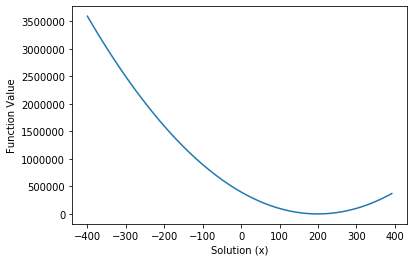

In [11]:
## Visualize test function 

## Initialize test function 

fom = quad_uni(10, 10, 5, 200, 100)

n =100
pos_range = [-400,400]
step_size = (pos_range[1]-pos_range[0])/n

#exhaustic search
x = np.zeros(n)
y = np.zeros(n)
for i in range(n):
    x[i] = pos_range[0]+i*step_size
    y[i]=fom.eval(x[i])
plt.figure(figsize=(6,4))
plt.plot(x,y)
plt.ylabel('Function Value')
plt.xlabel('Solution (x)')
plt.show()

In [12]:
## Gradient descent using Evolutionary Strategy

def es_optimize(funct, x_init, es_coef): 
    #funct: function class object
    #x_init: array, initial solution
    #es_coef: optimization coefficients    
        # "n": number of steps
        # "m": nubmer of mutations
        # "alpha" :  step size parameter
        # "sigma" : search distribution variance
    
    n = es_coef["n"]
    m = es_coef["m"]
    alpha = es_coef["alpha"]
    sigma = es_coef["sigma"]

    p = len(x_init) #dimension of the solution
    
    ## Initialization
    x = np.zeros([n, p])
    y = np.zeros([n, p])
    y_muta = np.zeros(m)

    x[0,]=x_init
    y[0] =  funct.eval(x[0,])
    
    for i in range(n-1):
        c_sum = np.zeros(p)
        d_muta = np.random.normal(0, sigma, [m,p]) #Generate mutations

        #Estimate gradient using weighted mutations
        for j in range(m):
            y_muta[j] = funct.eval(x[i,]+d_muta[j,])
            c_sum = c_sum + (y_muta[j]-y[i])*d_muta[j,]

        #Update solutions using estimated gradient
        x[i+1,] = x[i,]-c_sum*alpha/(sigma**2*m)
        y[i+1] = funct.eval(x[i+1])
        
    results = {
        "x_vec": x,
        "y_vec": y,
    }
        
    return results

### Expriments

In [6]:
es_coef = {
"n": 50, # number of steps
"m": 10, # nubmer of mutations
"alpha" :  0.01, # step size parameter
"sigma" : 0.001 #search distribution variance
}

x_init = [55]

## Optmize using Evolutionary Strategy
results = es_optimize(fom,x_init, es_coef)

### Visualization

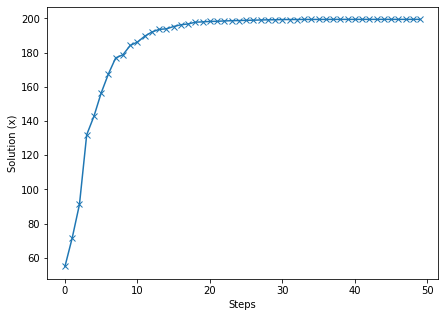

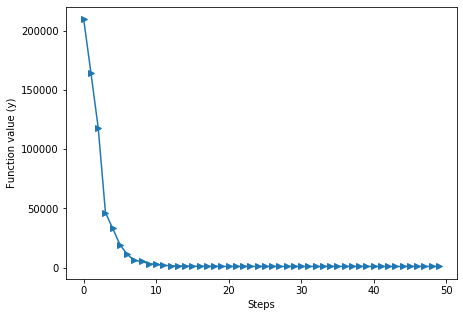

In [18]:
x_vec = results["x_vec"]
y_vec = results["y_vec"]

plt.figure(figsize=(7,5))
plt.plot(x_vec,'-x');
plt.ylabel("Solution (x)")
plt.xlabel("Steps");
plt.show()

plt.figure(figsize=(7,5));
plt.plot(y_vec,'->');
plt.ylabel("Function value (y)")
plt.xlabel("Steps");
plt.show()